In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset and check sheet names
xls = pd.ExcelFile("EastWestAirlines.xlsx")
print("Sheet names:", xls.sheet_names)

# Load the relevant sheet; we know it is "data"
data = pd.read_excel(xls, sheet_name='data', skiprows=1)  # Skip the first metadata row

# Display the first few rows of the dataset to ensure we have loaded the correct data
print("Initial data:")
print(data.head(10))

# Drop columns with all missing values
data = data.dropna(axis=1, how='all')

# Select only numeric columns for further processing
numeric_data = data.select_dtypes(include=[np.number])
print("\nNumeric data columns:")
print(numeric_data.columns)

# Display the shape of numeric data
print(f"Shape of numeric data: {numeric_data.shape}")

# Check for any remaining NaNs or infinite values
print("\nRemaining NaNs in numeric data:")
print(numeric_data.isnull().sum())
print("\nRemaining infinite values in numeric data:")
print((numeric_data == np.inf).sum())
print((numeric_data == -np.inf).sum())

# Calculate z-scores for outlier removal
z_scores = (numeric_data - numeric_data.mean()) / numeric_data.std()

# Remove outliers beyond 3 standard deviations
data_no_outliers = numeric_data[(z_scores.abs() < 3).all(axis=1)]
print(f"\nData shape after removing outliers: {data_no_outliers.shape}")

# Ensure data_no_outliers is numeric
data_no_outliers = data_no_outliers.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values if any
data_no_outliers = data_no_outliers.dropna()

# Replace infinite values with NaN and drop them
data_no_outliers = data_no_outliers.replace([np.inf, -np.inf], np.nan)
data_no_outliers = data_no_outliers.dropna()

# Check the shape of the data_no_outliers to ensure there are no NaNs left
print(f"\nData shape after dropping NaNs and infinite values: {data_no_outliers.shape}")

# Convert column names to strings
data_no_outliers.columns = data_no_outliers.columns.astype(str)

# Check the data types to ensure all are numeric
print("\nData types in data_no_outliers:")
print(data_no_outliers.dtypes)

# Display the first few rows of data_no_outliers
print("\nFirst few rows of data_no_outliers:")
print(data_no_outliers.head())

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_no_outliers)

# Display the shape of the standardized data
print(f"\nShape of standardized data: {scaled_data.shape}")


Sheet names: ['Description', 'data']
Initial data:
    1   28143  0  1.1  1.2  1.3    174  1.4   0.1  0.2  7000  0.3
0   2   19244  0    1    1    1    215    2     0    0  6968    0
1   3   41354  0    1    1    1   4123    4     0    0  7034    0
2   4   14776  0    1    1    1    500    1     0    0  6952    0
3   5   97752  0    4    1    1  43300   26  2077    4  6935    1
4   6   16420  0    1    1    1      0    0     0    0  6942    0
5   7   84914  0    3    1    1  27482   25     0    0  6994    0
6   8   20856  0    1    1    1   5250    4   250    1  6938    1
7   9  443003  0    3    2    1   1753   43  3850   12  6948    1
8  10  104860  0    3    1    1  28426   28  1150    3  6931    1
9  11   40091  0    2    1    1   7278   10     0    0  6959    0

Numeric data columns:
Index([1, 28143, 0, '1.1', '1.2', '1.3', 174, '1.4', '0.1', '0.2', 7000,
       '0.3'],
      dtype='object')
Shape of numeric data: (3998, 12)

Remaining NaNs in numeric data:
1        0
28143    0
0

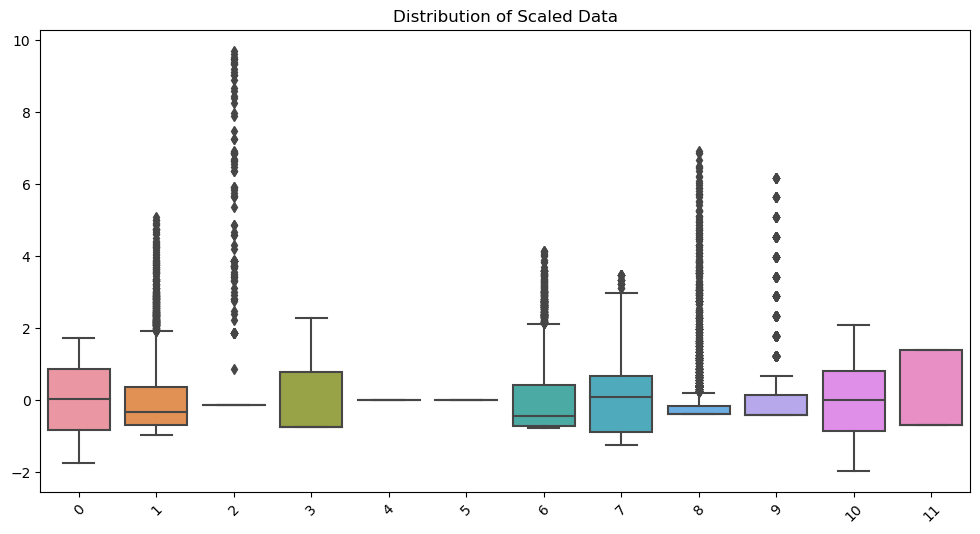

In [6]:
# Analyze the distribution of data
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_data)
plt.title('Distribution of Scaled Data')
plt.xticks(rotation=45)
plt.show()


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

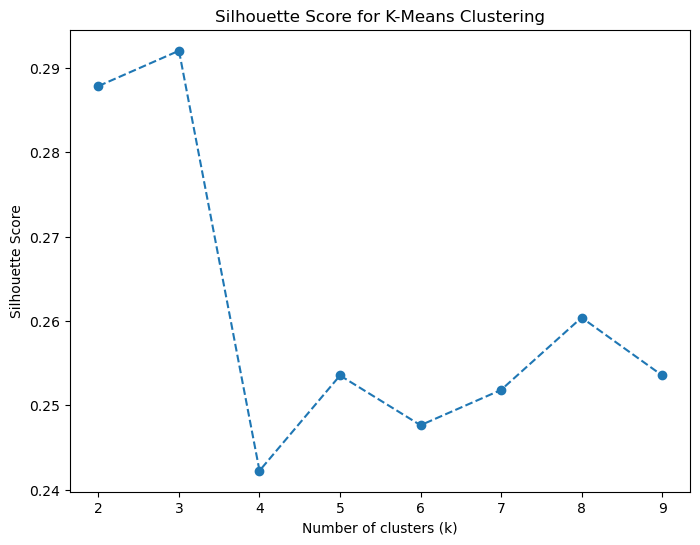

In [7]:
# Apply K-Means clustering with different number of clusters
kmeans_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    kmeans_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting silhouette scores for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_range, kmeans_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()


In [9]:
# Apply Hierarchical clustering

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_cluster.fit_predict(scaled_data)


In [10]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)


In [11]:
# Example of cluster analysis for K-Means clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Transform back to original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_data.columns)

# Display cluster centers
print("Cluster Centers:")
print(cluster_centers_df)


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
             1          28143            0       1.1  1.2  1.3           174  \
0  3153.860606   35574.711364     4.746212  1.312121  1.0  1.0   5215.087879   
1  1987.285714   97726.967742    55.603687  2.078341  1.0  1.0  20055.170507   
2  1576.823966  101895.363733     6.529162  3.791092  1.0  1.0  36863.007423   
3  1114.086031   46567.722479     5.027752  1.260870  1.0  1.0   4539.641998   
4  1914.652174   78851.768116  1648.826087  1.884058  1.0  1.0  14768.072464   

         1.4          0.1       0.2         7000       0.3  
0   7.010606    88.143939  0.317424  2104.289394  0.180303  
1  16.589862  2303.834101  6.483871  4234.562212  0.622120  
2  17.783669   165.675504  0.515376  4896.819724  0.604454  
3   7.056429   115.004625  0.400555  5670.782609  0.231267  
4  11.043478   481.304348  1.565217  4327.869565  0.623188  


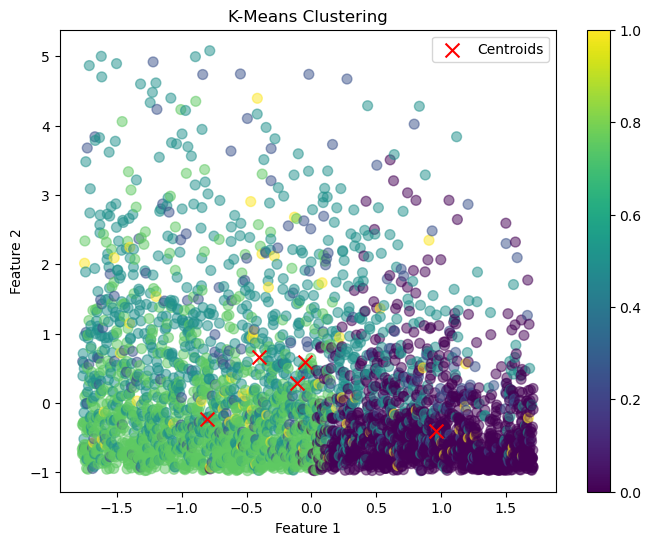

In [12]:
# Visualize K-Means clustering results (example plot, adjust as needed)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, color='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.legend()
plt.show()


In [13]:
# Example: Silhouette score for K-Means clustering
kmeans_silhouette = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for K-Means Clustering: {kmeans_silhouette}")


Silhouette Score for K-Means Clustering: 0.25353865136209275
